/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


2018-08-23T05:08:03.000008704
2018-08-23T05:08:04.999997952


(0.0, 1500.0)

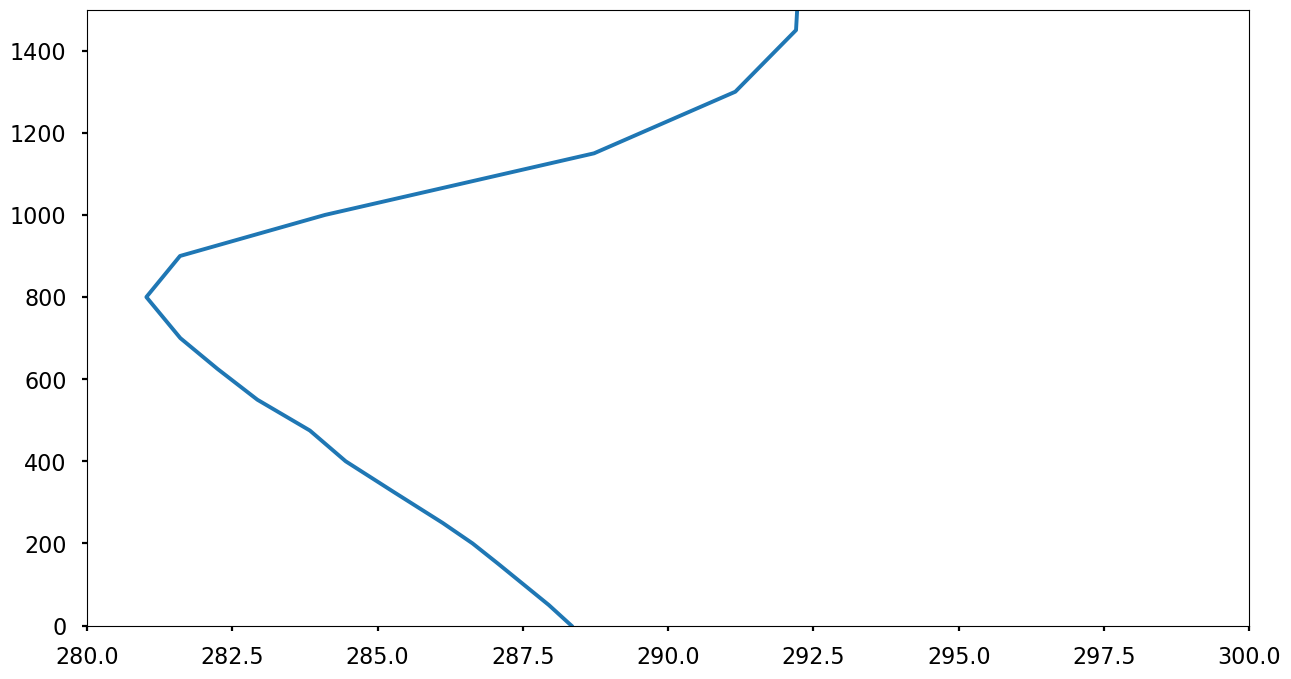

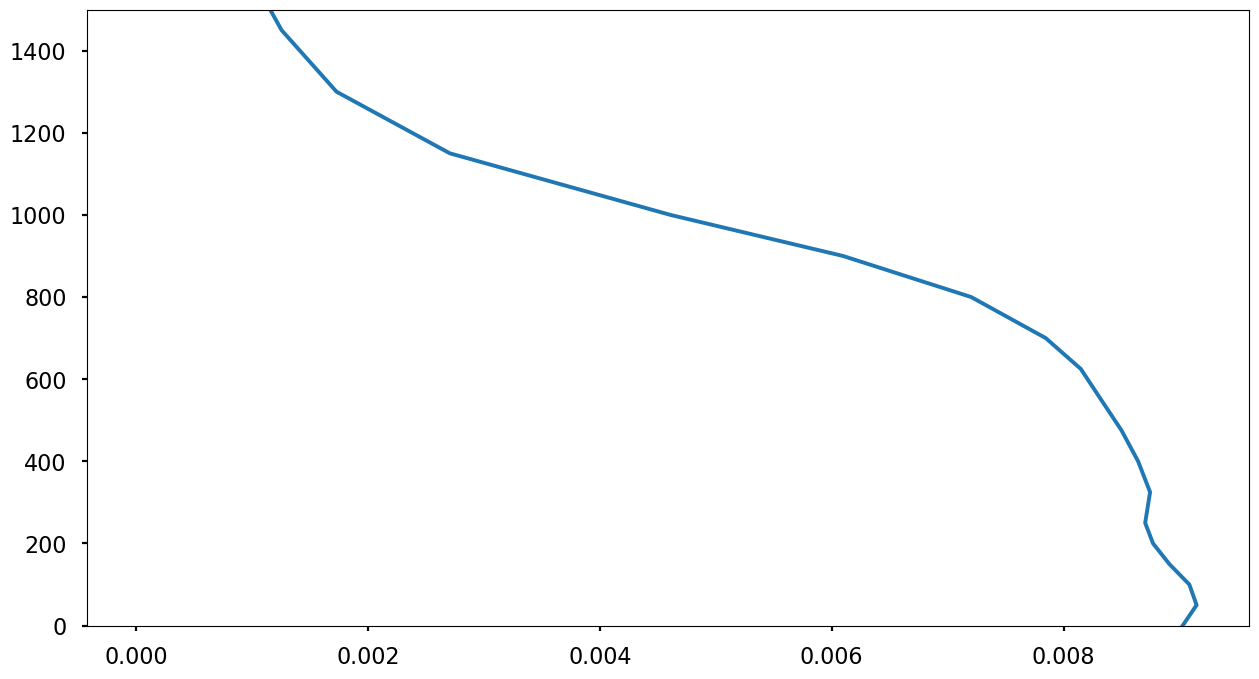

In [2]:
# Once plot STBL profiles from Iquique instead of Wood graphic:
# q; ql; Theta_e; T 

###################################
# Foghat data:

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font', size=12) 
plt.style.use('seaborn-poster')

file_hua22 = "/home/qwertz/obs_data_MA/iqq_foghat/22/sups_iqq_mwr00_l2_hua_p00_20180822000000.nc"
file_prw22 = "/home/qwertz/obs_data_MA/iqq_foghat/22/sups_iqq_mwr00_l2_prw_p00_20180822000000.nc"
# file_00ta22 = "/home/qwertz/obs_data_MA/iqq_foghat/22/sups_iqq_mwr00_l2_ta_p00_20180822000000.nc"
file_BLta22 = "/home/qwertz/obs_data_MA/iqq_foghat/22/sups_iqq_mwrBL00_l2_ta_p00_20180822000243.nc"
file_hua23 = "/home/qwertz/obs_data_MA/iqq_foghat/23/sups_iqq_mwr00_l2_hua_p00_20180823000000.nc"
file_prw23 = "/home/qwertz/obs_data_MA/iqq_foghat/23/sups_iqq_mwr00_l2_prw_p00_20180823000000.nc"
# file_00ta23 = "/home/qwertz/obs_data_MA/iqq_foghat/23/sups_iqq_mwr00_l2_ta_p00_20180823000000.nc"
file_BLta23 = "/home/qwertz/obs_data_MA/iqq_foghat/23/sups_iqq_mwrBL00_l2_ta_p00_20180823000753.nc"

ds_hua = xr.open_mfdataset([file_hua22, file_hua23])# # absolute humidity kg m-3 rho
ds_prw = xr.open_mfdataset([file_prw22, file_prw23])# # atmosphere_mass_content_of_water_vapor kg m-2 IWV
# ds_00ta = xr.open_mfdataset([file_00ta22, file_00ta23])# # T Kelvin
ds_BLta = xr.open_mfdataset([file_BLta22, file_BLta23])# # t Kelvin / less timesteps...
#####
# Entfernen von doppelten Zeitpunkten:
ds_hua = ds_hua.drop_duplicates("time")
ds_prw = ds_prw.drop_duplicates("time")
# ds_00ta = ds_00ta.drop_duplicates("time")
ds_BLta = ds_BLta.drop_duplicates("time")

# Datatset from me:
ds_theta_v = xr.open_dataset("/home/qwertz/obs_data_MA/iqq_foghat/theta_v_iqq_22_23apschera20240214.nc")

#####################################
# Cloudnet: 

cloudnet_path = "/home/qwertz/obs_data_MA/iqq_cloudnet/"
files = ["20180822_iquique_classification.nc","20180823_iquique_classification.nc",\
         "20180822_iquique_halo-doppler-lidar_BL-classification.nc", "20180823_iquique_halo-doppler-lidar_BL-classification.nc",\
         "20180822_iquique_halo-doppler-lidar_cloud.nc", "20180823_iquique_halo-doppler-lidar_cloud.nc",\
         "20180822_iquique_lwc-adiabatic-method.nc", "20180823_iquique_lwc-adiabatic-method.nc"]

ds_class22 = xr.open_dataset(cloudnet_path+files[0])
ds_class23 = xr.open_dataset(cloudnet_path+files[1])
ds_class = xr.concat([ds_class22, ds_class23], dim="time")

#####################################

######################################
# Create plot:


print(ds_BLta["time"].values[105])
print(ds_hua["time"].values[76163])


plt.figure(figsize=(15,8))
plt.plot(ds_BLta["ta"].values[105,:], ds_BLta["height"]) # 2018-08-23T05:08:03.000008704
plt.ylim(0,1500)
plt.xlim(280,300)

plt.figure(figsize=(15,8))
plt.plot(ds_hua["hua"].values[76163,:], ds_BLta["height"]) # 2018-08-23T05:08:03.000008704
plt.ylim(0,1500)

################################
# Du solltest den Code so modifizieren, dass du einen Zeitschritt auswählst und der Plot sofort da ist, 
# mit dem jeweils nächsten Zeitschritt von allen Instrumenten 

In [6]:
print(ds_class["cloud_top_height"].isel(layer=0).mean("time"))

<xarray.DataArray 'cloud_top_height' ()> Size: 4B
array(1058.7656, dtype=float32)
